In [41]:
%matplotlib inline

In [69]:
import requests
import json
import matplotlib.pyplot as plt

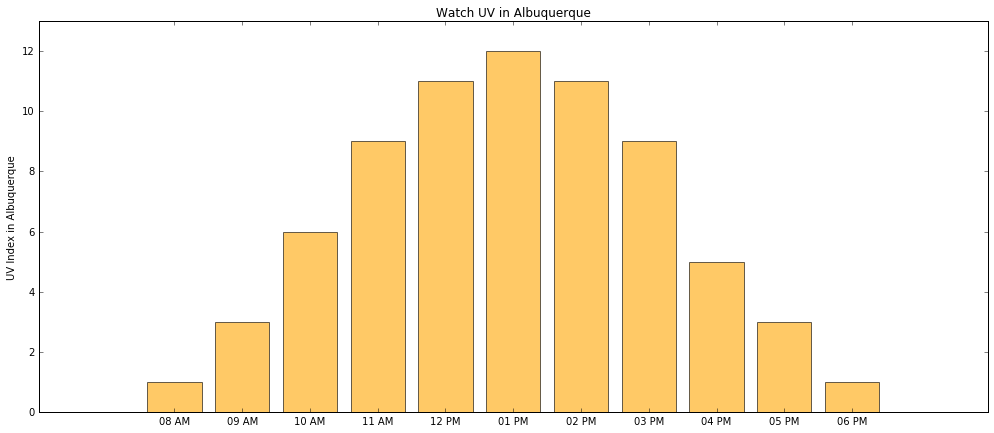

In [120]:
# REST API docs at https://www.epa.gov/enviro/web-services#hourlyzip
url = 'https://iaspub.epa.gov/enviro/efservice/getEnvirofactsUVHOURLY/ZIP/87106/JSON'
uv = requests.get(url)

uvjson = uv.json()
uvjsonlen = len(uvjson)

# print uvjson
# print uvjson[0]['ORDER'], uvjson[0]['DATE_TIME'], uvjson[0]['UV_VALUE']
# print uvjsonlen,range(uvjsonlen)

x_order = [uvjson[i]['ORDER'] for i in range(uvjsonlen)]
x_datetime = [uvjson[i]['DATE_TIME'] for i in range(uvjsonlen)]
y_uv = [uvjson[i]['UV_VALUE'] for i in range(uvjsonlen)]

x_hours = [hours[-5:] for hours in x_datetime]

# print x_order, '\n' , x_datetime, '\n', y_uv, '\n',  x_hours

start_index = next((i for i, x in enumerate(y_uv) if x), None)
end_index = start_index + 11

plt.figure(figsize=(17,7))
plt.bar(x_order[start_index:end_index], y_uv[start_index:end_index], color="orange", align='center', alpha=0.6)
plt.ylim(0,max(y_uv)+1)
plt.xticks(x_order[start_index:end_index], x_hours[start_index:end_index]);
plt.title('Watch UV in Albuquerque');
plt.ylabel('UV Index in Albuquerque');

## Using Plotly

In [117]:
import plotly.plotly as py
from plotly.graph_objs import *

In [118]:
plydata = Bar(
  x=x_hours,
  y=y_uv
)

data = Data([plydata])

py.iplot(data, filename = 'Albuquerque Watch UV Index')